In [81]:
# Import the libraries that we are going to use
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [35]:
# Set the path of the file we will read
file = "C:/Users/srped/Desktop/Project/Life-Expectancy-and-GDP-Starter/all_data.csv"

In [46]:
# Read the file
countries = pd.read_csv(file)

# Display the first rows and columns of data
countries.head(5)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [47]:
# Display the type of data and the possibility of having nulls
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.7+ KB


# Questions we would like to have an answer
1. Which country has a higher life expectancy?
2. Which country has a higher GPD?
3. Is there any correlation between higher GPD and Life Expectancy? How strong is that correlation?
4. If there's a correlation between both variables, how is each countries growth?
5. How has life expectancy and GDP improved within the years?

In [48]:
# Before analysing with some visuals we want to know what are the countries in our dataset
countries.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [49]:
# We visualize the year that we have in our dataset too
countries.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [50]:
# Let's summarize some data first
countries.describe(include = "all")

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [55]:
countries["Country"].loc[countries.Country == "United States of America"] = "USA"

C:\Users\srped\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [56]:
countries.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'],
      dtype=object)

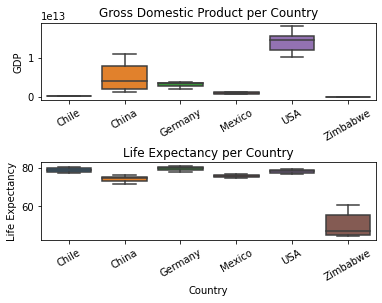

In [61]:
# Let's get a visualization with a distribution of each country GPD and Life expectancy
ax1 = plt.subplot(2, 1, 1)
sns.boxplot(x = countries.Country, y = countries.GDP)
plt.xticks(rotation = 30)
plt.title("Gross Domestic Product per Country")
plt.ylabel("GDP")
plt.xlabel("")
ax2 = plt.subplot(2, 1, 2)
sns.boxplot(x = countries.Country, y = countries["Life expectancy at birth (years)"])
plt.xticks(rotation = 30)
plt.title("Life Expectancy per Country")
plt.ylabel("Life Expectancy")
plt.subplots_adjust(hspace = 0.8)

We can clearly see that Zimbabwe is a country that GDP and Life Expectancy is quite low compared to other countries. Seems also that Chile as one of the lowest GDP but the life expectancy is one of the highest.

Text(0, 0.5, 'GDP')

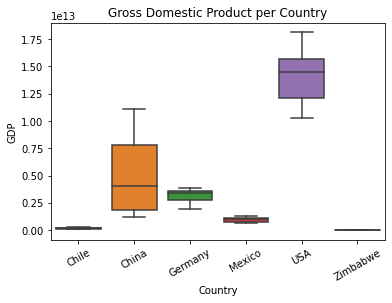

In [63]:
# Let's get a better picture of the differences between the countries that we are analysing, We know that USA and China as the highest GDP compared to other countries but we want to zoom in
sns.boxplot(x = countries.Country, y = countries.GDP)
plt.xticks(rotation = 30)
plt.title("Gross Domestic Product per Country")
plt.ylabel("GDP")

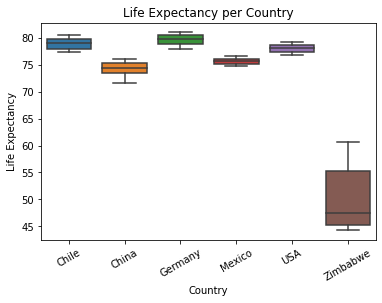

<Figure size 432x288 with 0 Axes>

In [77]:
plt.subplot()
sns.boxplot(x = countries.Country, y = countries["Life expectancy at birth (years)"])
plt.xticks(rotation = 30)
plt.title("Life Expectancy per Country")
plt.ylabel("Life Expectancy")
plt.show()
plt.clf()

So far, we can say that United States of America has a higher GDP and Germany has a better Life Expectancy

 R Pearson Coefficient:
0.34320674844915594


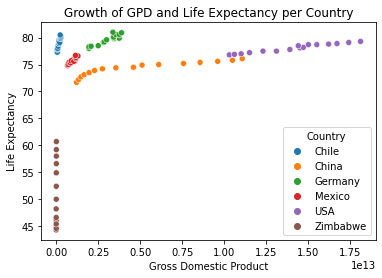

In [85]:
sns.scatterplot(x = countries.GDP, y = countries["Life expectancy at birth (years)"], hue = countries.Country)
plt.title("Growth of GPD and Life Expectancy per Country")
plt.xlabel("Gross Domestic Product")
plt.ylabel("Life Expectancy")
print(" R Pearson Coefficient:")
print(pearsonr(countries.GDP, countries["Life expectancy at birth (years)"])[0])

In the previous visualization we've seen a scatterplot that colors the different countries and demonstrates how a higher Gross Domestic Product is related to higher Life Expectancy. Plus, we've calculated the coefficient of R Pearson in order to have a better understanding of how strong was this correlation, and we got a result of 0.34, considering it a weak correlation.

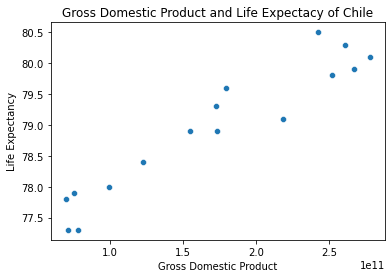

The R Pearson Coefficient for Chile is: 0.9498766659254416


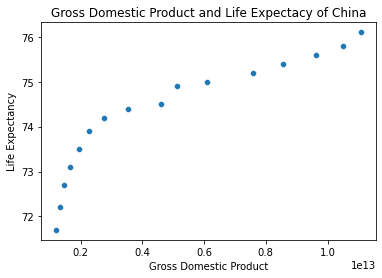

The R Pearson Coefficient for China is: 0.9085255408648358


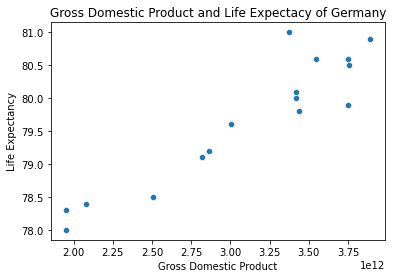

The R Pearson Coefficient for Germany is: 0.9326988982561268


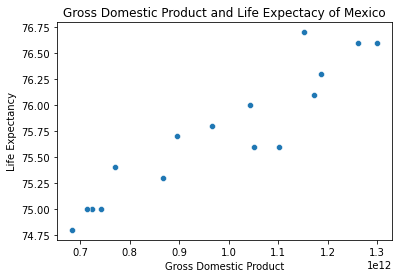

The R Pearson Coefficient for Mexico is: 0.9322377167847082


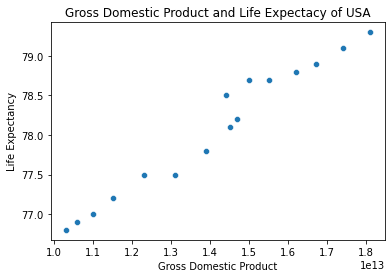

The R Pearson Coefficient for USA is: 0.9817092382430257


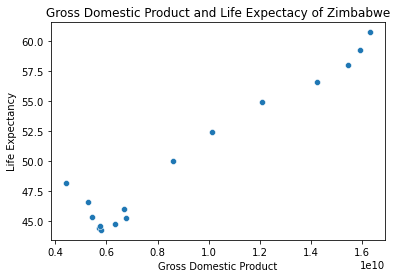

The R Pearson Coefficient for Zimbabwe is: 0.9661998955858777


<Figure size 432x288 with 0 Axes>

In [99]:
for country in countries.Country.unique():
    filtered = countries.loc[countries.Country == country]
    rpearson = pearsonr(filtered.GDP, filtered["Life expectancy at birth (years)"])[0]
    sns.scatterplot(x = filtered.GDP, y = filtered["Life expectancy at birth (years)"])
    plt.title(f"Gross Domestic Product and Life Expectacy of {country}")
    plt.xlabel("Gross Domestic Product")
    plt.ylabel("Life Expectancy")
    plt.show()
    plt.clf()
    print(f"The R Pearson Coefficient for {country} is: {rpearson}")

As we were analysing we saw in our scatterplot that gross domestic product was somehow related to our life expectancy, even though, it wasn't that strong. To us, it looked that relation was quite strong so we decided to split that pearson coefficient with each country. Giving us, actually, a very strong correlation between both variables.

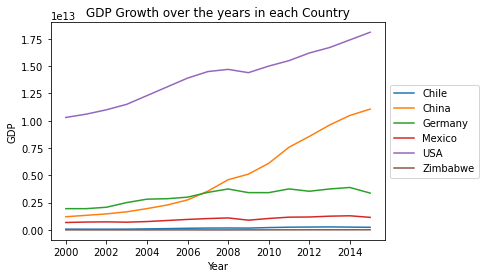

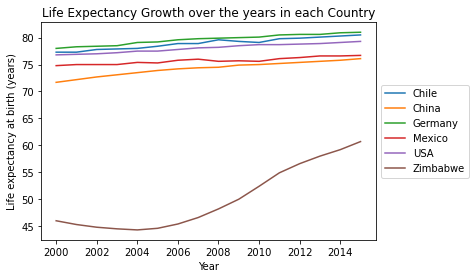

<Figure size 432x288 with 0 Axes>

In [96]:
ax = plt.subplot()
sns.lineplot(x = countries.Year, y = countries.GDP, hue = countries.Country)
plt.title("GDP Growth over the years in each Country")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.clf()

ax2 = plt.subplot()
sns.lineplot(x = countries.Year, y = countries["Life expectancy at birth (years)"], hue = countries.Country)
plt.title("Life Expectancy Growth over the years in each Country")
ax2.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.show()
plt.clf()

The growth that China has had in gross domestic product is astonishing, even though, United Stated of America didn't grow that much, is still the country with higher GDP.
As life expectancy, most countries has improved their life expectancy, with Zimbabwe being the country with a bigger change in life expectancy.

# Conclusions:
+ Gross Domestic Product is highly correlated to the life expectacy of each country
+ The countries that has had a bigger change in previous years are China in GDP and Zimbabwe in Life expectancy
+ United States of America is the country with the best Gross Domestic Product
+ Germany looks like the country with a higher life expectancy